## Business Intelligence Assignment 2: Data Analytics

### (2) Data Understanding: Data Description Report presenting

In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import pickle
import typing
from scipy.stats import zscore
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point

/opt/conda/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
file_path = os.path.join(os.environ["HOME"], "Business Intelligence", "AB_US_2023_Final.csv")
df = pd.read_csv(file_path, sep=";", dtype={'neighbourhood_group': 'str'}, low_memory=False)
display(df.head(3))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,3777028,-12243317,Entire home/apt,202,2,383,19.02.2023,231.0,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,3774474,-12242089,Entire home/apt,235,30,111,06.08.2017,66.0,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,3776555,-12245213,Private room,56,32,9,27.10.2022,9.0,13,365,1,San Francisco


### a. Attribute Types

In [3]:
# Define expected datatypes
def define_expected_dtypes():
    return {
        "id": "Integer",
        "name": "String",
        "host_id": "Integer",
        "host_name": "String",
        "neighbourhood_group": "String",
        "neighbourhood": "String",
        "latitude": "Float",
        "longitude": "Float",
        "room_type": "String",
        "price": "Integer",
        "minimum_nights": "Integer",
        "number_of_reviews": "Integer",
        "last_review": "Date",
        "reviews_per_month": "Float",
        "calculated_host_listings_count": "Integer",
        "availability_365": "Integer",
        "number_of_reviews_ltm": "Integer",
        "city": "String"
    }

### b. Statistical properties

In [4]:
# Statistical Calculations

column_dict = {
    'Column': [],
    'Mean': [],
    'Max': [],
    'Min': [],
    'Variance': [],
    'Std': [],
}

df_copy = df.copy()
df_copy.drop(columns=['id', 'host_id'], inplace=True)

for column in df_copy.columns:
    if df_copy[column].dtype == np.int32 or df_copy[column].dtype == np.int64 or df_copy[column].dtype == np.float64:
        column_dict['Column'].append(column)
        column_dict['Mean'].append(round(df_copy[column].mean(), 2))
        column_dict['Max'].append(round(df_copy[column].max(), 2))
        column_dict['Min'].append(round(df_copy[column].min(), 2))
        column_dict['Variance'].append(round(df_copy[column].var(), 2))
        column_dict['Std'].append(round(df_copy[column].std(), 2))


stats_df = pd.DataFrame(column_dict)
stats_df.set_index(['Column'], inplace=True)
display(stats_df)

,Mean,Max,Min,Variance,Std
Column,,,,,
price,259.47,100000.0,0.0,1049899.26,1024.65
minimum_nights,13.50,1250.0,1.0,779.56,27.92
number_of_reviews,40.92,3091.0,0.0,6504.29,80.65
reviews_per_month,144.24,10142.0,1.0,35034.47,187.17
calculated_host_listings_count,29.88,1003.0,1.0,11238.90,106.01
availability_365,180.99,365.0,0.0,18148.21,134.72
number_of_reviews_ltm,11.69,1314.0,0.0,424.36,20.60


### c. Data quality

#### Check for Datatype Inconsistencies

In [5]:
def check_type_inconsistencies(df):
    inconsistent_columns = {
        'Column': [],
        'Unique Types Count': []
    }
    
    for column in df.columns:
        # Count the unique data types in each column
        unique_types = df[column].map(type).nunique()
        if unique_types > 1:
            inconsistent_columns['Column'].append(column)
            inconsistent_columns['Unique Types Count'].append(unique_types)
    
    # Convert results to DataFrame
    inconsistencies_df = pd.DataFrame(inconsistent_columns)
    inconsistencies_df.set_index(['Column'], inplace=True)
    return inconsistencies_df

In [6]:
type_inconsistencies_df = check_type_inconsistencies(df)
display(type_inconsistencies_df)

,Unique Types Count
Column,
name,2
host_name,2
neighbourhood_group,2
last_review,2


#### Check for Missing-Values

In [7]:
def check_missing_values(df):
    # Nur Spalten auswählen, die nicht mit '_zscore' enden
    relevant_columns = [col for col in df.columns if not col.endswith('_zscore')]
    # Fehlende Werte für die gefilterten Spalten berechnen
    missing_values = df[relevant_columns].isnull().sum()
    
    # Erstellen eines DataFrames für fehlende Werte
    missing_values_df = pd.DataFrame({
        'Attribute': missing_values.index,
        'Missing Values Count': missing_values.values,
        'Missing Values Percent': (missing_values.values / len(df) * 100).round(2)
    })
    
    # Setzt die Spalte 'Attribute' als Index
    missing_values_df.set_index('Attribute', inplace=True)
    return missing_values_df

In [8]:
missing_values_df = check_missing_values(df)
display(missing_values_df)

,Missing Values Count,Missing Values Percent
Attribute,,
id,0,0.00
name,16,0.01
host_id,0,0.00
host_name,13,0.01
neighbourhood_group,135647,58.43
neighbourhood,0,0.00
latitude,0,0.00
longitude,0,0.00
room_type,0,0.00


#### Z-Score based extreme value detection

In [9]:
# Define relevant columns for extreme value detection
def get_extreme_value_columns():
    return [
        "latitude", "longitude", "price", "minimum_nights",
        "number_of_reviews", "reviews_per_month",
        "calculated_host_listings_count", "availability_365", "number_of_reviews_ltm"
    ]

def check_extreme_values_zscore(df):
    extreme_value_columns = get_extreme_value_columns()
    extreme_value_results = {}
    for column in extreme_value_columns:
        if column in df.columns:
            # Convert the column to numeric, coercing errors to NaN
            df[column] = pd.to_numeric(df[column], errors='coerce')
            # Drop NaN values before calculating the z-score
            df[column + "_zscore"] = zscore(df[column].dropna())
            # Get extreme values based on z-scores
            low_extreme_values = df[df[column + "_zscore"] < -3][column]
            high_extreme_values = df[df[column + "_zscore"] > 3][column]
            extreme_value_results[column] = {
                "Low Z-Score Values (< -3)": f"{low_extreme_values.min()} to {low_extreme_values.max()}" if not low_extreme_values.empty else "No values",
                "High Z-Score Values (> 3)": f"{high_extreme_values.min()} to {high_extreme_values.max()}" if not high_extreme_values.empty else "No values"
            }
    return extreme_value_results

In [10]:
extreme_value_results = check_extreme_values_zscore(df)
print("\nExtreme Values per Attribute using Z-Score Method:")
for column, details in extreme_value_results.items():
    print(f"\nAttribute: {column}")
    print(f"  Z-Score Values below -3: {details['Low Z-Score Values (< -3)']}")
    print(f"  Z-Score Values above 3: {details['High Z-Score Values (> 3)']}")


Extreme Values per Attribute using Z-Score Method:

Attribute: latitude
  Z-Score Values below -3: No values
  Z-Score Values above 3: 475102054.0 to 34204294013.0

Attribute: longitude
  Z-Score Values below -3: -12238400269.0 to -737216024.0
  Z-Score Values above 3: No values

Attribute: price
  Z-Score Values below -3: No values
  Z-Score Values above 3: 3334 to 100000

Attribute: minimum_nights
  Z-Score Values below -3: No values
  Z-Score Values above 3: 98 to 1250

Attribute: number_of_reviews
  Z-Score Values below -3: No values
  Z-Score Values above 3: 283 to 3091

Attribute: reviews_per_month
  Z-Score Values below -3: No values
  Z-Score Values above 3: 706.0 to 10142.0

Attribute: calculated_host_listings_count
  Z-Score Values below -3: No values
  Z-Score Values above 3: 356 to 1003

Attribute: availability_365
  Z-Score Values below -3: No values
  Z-Score Values above 3: No values

Attribute: number_of_reviews_ltm
  Z-Score Values below -3: No values
  Z-Score Values

#### Check for inconsistencies based on various rules and display examples

- Check for unique and consistent ID
- Check for duplicate descriptions in 'name'
- Ensure unique host IDs
- Verify consistency in host names for the same host ID
- Room Type Checks
  - Check for allowed room types
  - Check for consistent spelling in room_type
  - Check for non-numeric values in room_type
- Latitude and Longitude Checks
- City Checks
  - City Checks for consistent spelling
  - Check for non-numeric values in city
- Neighbourhood Checks
  - Check neighbourhoods variants
  - Check for non-numeric values in neighbourhood
- Check for non-positive values in price

In [11]:
def check_for_inconsistencies(df):
    results = []

    # Check for unique and consistent ID
    duplicate_ids = df[df['id'].duplicated()]['id'].unique()
    results.append({
        'Attribute': 'id',
        'Check': 'Unique IDs',
        'Result': f"Duplicates found: {duplicate_ids[:2]}" if len(duplicate_ids) > 0 else "Consistent"
    })

    # Check for duplicate descriptions in 'name'
    duplicate_names = df[df['name'].duplicated()]['name'].unique()
    results.append({
        'Attribute': 'name',
        'Check': 'Duplicate Descriptions',
        'Result': f"Duplicates found: {duplicate_names[:2]}" if len(duplicate_names) > 0 else "Consistent"
    })

    # Ensure unique host IDs
    duplicate_host_ids = df[df['host_id'].duplicated()]['host_id'].unique()
    results.append({
        'Attribute': 'host_id',
        'Check': 'Unique host IDs',
        'Result': f"Duplicates found: {duplicate_host_ids[:2]}" if len(duplicate_host_ids) > 0 else "Consistent"
    })

    # Verify consistency in host names for the same host ID
    inconsistent_host_names = df.groupby('host_id')['host_name'].nunique().loc[lambda x: x > 1].index
    results.append({
        'Attribute': 'host_name',
        'Check': 'Consistency in host names',
        'Result': f"Inconsistent host names for IDs: {inconsistent_host_names[:2].tolist()}" if len(inconsistent_host_names) > 0 else "Consistent"
    })

    # Room Type Checks
    allowed_room_types = {"Private room", "Entire home/apt", "Hotel room", "Shared room"}
    invalid_room_types = df[~df['room_type'].isin(allowed_room_types)]['room_type'].unique()
    if len(invalid_room_types) > 0:
        results.append({
            'Attribute': 'room_type',
            'Check': 'Allowed Room Types',
            'Result': f"Invalid room types: {invalid_room_types[:2]}"
        })
    else:
        results.append({
            'Attribute': 'room_type',
            'Check': 'Allowed Room Types',
            'Result': "Consistent"
        })

    # Check for consistent spelling in room_type
    room_type_variants = df['room_type'].str.lower().unique()
    if len(room_type_variants) > len(allowed_room_types):
        results.append({
            'Attribute': 'room_type',
            'Check': 'Consistent Spelling in room_type',
            'Result': f"Inconsistent spelling in room_type: {df['room_type'].unique()[:2]}"
        })
    else:
        results.append({
            'Attribute': 'room_type',
            'Check': 'Consistent Spelling in room_type',
            'Result': "Consistent"
        })

    # Check for non-numeric values in room_type
    numeric_room_types = df['room_type'][df['room_type'].apply(lambda x: isinstance(x, str) and x.isnumeric())].unique()
    if len(numeric_room_types) > 0:
        results.append({
            'Attribute': 'room_type',
            'Check': 'Non-numeric values',
            'Result': f"Numeric values found in room_type: {numeric_room_types[:2]}"
        })
    else:
        results.append({
            'Attribute': 'room_type',
            'Check': 'Non-numeric values',
            'Result': "Consistent"
        })

    # Latitude and Longitude Checks
    invalid_latitude = df[(df['latitude'] < -90) | (df['latitude'] > 90)]['latitude'].unique()
    results.append({
        'Attribute': 'latitude',
        'Check': 'Latitude within -90 to 90',
        'Result': f"Out of range values: {invalid_latitude[:2]}" if len(invalid_latitude) > 0 else "Consistent"
    })

    invalid_longitude = df[(df['longitude'] < -180) | (df['longitude'] > 180)]['longitude'].unique()
    results.append({
        'Attribute': 'longitude',
        'Check': 'Longitude within -180 to 180',
        'Result': f"Out of range values: {invalid_longitude[:2]}" if len(invalid_longitude) > 0 else "Consistent"
    })

    # City Checks for consistent spelling
    city_variants_dict = {}
    for city in df['city'].unique():
        normalized_city = city.strip().lower()
        if normalized_city in city_variants_dict:
            results.append({
                'Attribute': 'city',
                'Check': 'Consistent Spelling in city',
                'Result': f"Inconsistent spelling found: '{city}' and '{city_variants_dict[normalized_city]}'"
            })
        else:
            city_variants_dict[normalized_city] = city

    if not any(r for r in results if r['Attribute'] == 'city' and 'Consistent Spelling' in r['Check']):
        results.append({
            'Attribute': 'city',
            'Check': 'Consistent Spelling in city',
            'Result': "Consistent"
        })

    # Check for non-numeric values in city
    numeric_cities = df['city'][df['city'].apply(lambda x: isinstance(x, str) and x.isnumeric())].unique()
    if len(numeric_cities) > 0:
        results.append({
            'Attribute': 'city',
            'Check': 'Non-numeric values',
            'Result': f"Numeric values found in city: {numeric_cities[:2]}"
        })
    else:
        results.append({
            'Attribute': 'city',
            'Check': 'Non-numeric values',
            'Result': "Consistent"
        })

    # Neighbourhood Checks
    neighbourhood_variants = df['neighbourhood'].str.lower().unique()
    if len(neighbourhood_variants) != len(df['neighbourhood'].unique()):
        results.append({
            'Attribute': 'neighbourhood',
            'Check': 'Consistent Spelling in neighbourhood',
            'Result': f"Inconsistent neighbourhood names: {df['neighbourhood'].unique()[:2]}"
        })
    else:
        results.append({
            'Attribute': 'neighbourhood',
            'Check': 'Consistent Spelling in neighbourhood',
            'Result': "Consistent"
        })

    # Check for non-numeric values in neighbourhood
    numeric_neighbourhoods = df['neighbourhood'][df['neighbourhood'].apply(lambda x: isinstance(x, str) and x.isnumeric())].unique()
    if len(numeric_neighbourhoods) > 0:
        results.append({
            'Attribute': 'neighbourhood',
            'Check': 'Non-numeric values',
            'Result': f"Numeric values found in neighbourhood: {numeric_neighbourhoods[:2]}"
        })
    else:
        results.append({
            'Attribute': 'neighbourhood',
            'Check': 'Non-numeric values',
            'Result': "Consistent"
        })

    # Check for non-positive values in price
    invalid_prices = df[df['price'] <= 0]['price'].unique()
    results.append({
        'Attribute': 'price',
        'Check': 'Positive prices',
        'Result': f"Non-positive values: {invalid_prices[:2]}" if len(invalid_prices) > 0 else "Consistent"
    })

    # Convert results to DataFrame for tabular output
    results_df = pd.DataFrame(results)
    return results_df

In [12]:
# Perform consistency checks and display as table
results_df = check_for_inconsistencies(df)
display(results_df)

,Attribute,Check,Result
0,id,Unique IDs,"Duplicates found: ['6,04269E+17' '6,24238E+17']"
1,name,Duplicate Descriptions,Duplicates found: ['FINANCIAL DIST: near shop...
2,host_id,Unique host IDs,Duplicates found: [ 21994 709325]
3,host_name,Consistency in host names,"Inconsistent host names for IDs: [14269516, 24..."
4,room_type,Allowed Room Types,Consistent
5,room_type,Consistent Spelling in room_type,Consistent
6,room_type,Non-numeric values,Consistent
7,latitude,Latitude within -90 to 90,Out of range values: [3777028. 3774474.]
8,longitude,Longitude within -180 to 180,Out of range values: [-12243317. -12242089.]
9,city,Consistent Spelling in city,Consistent


### d. Visual exploration

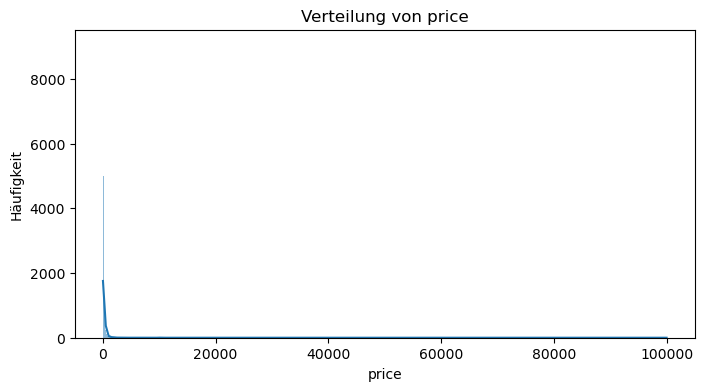

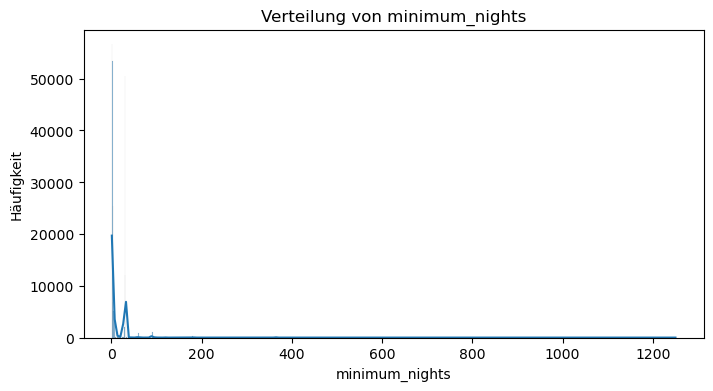

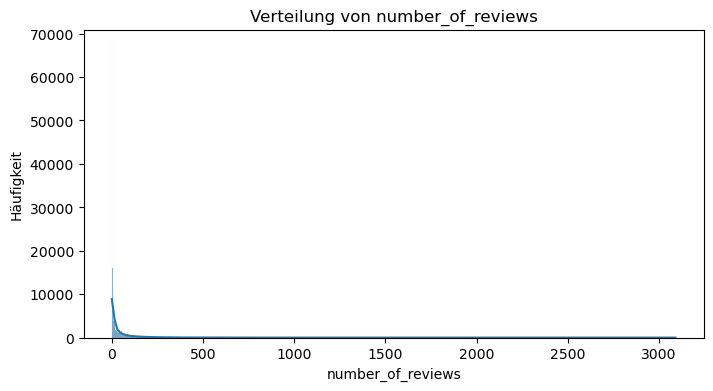

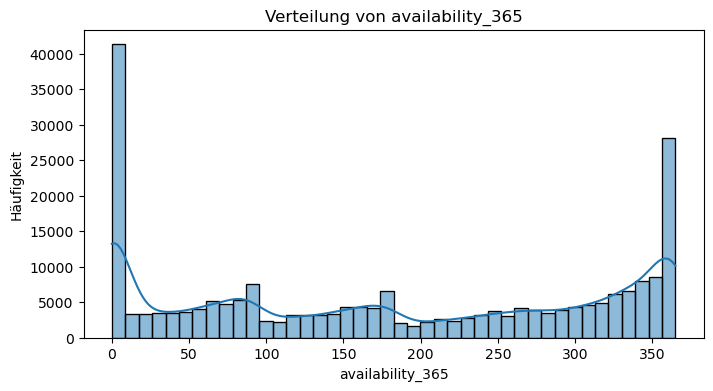

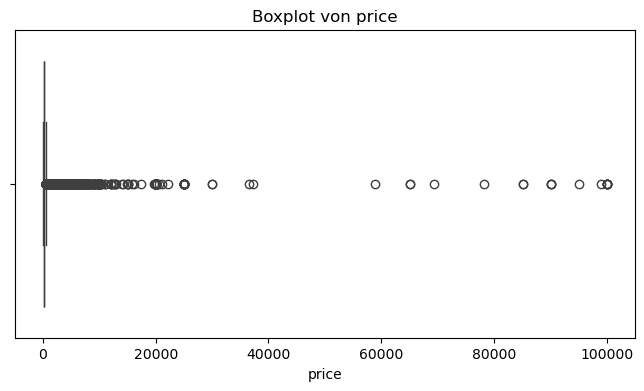

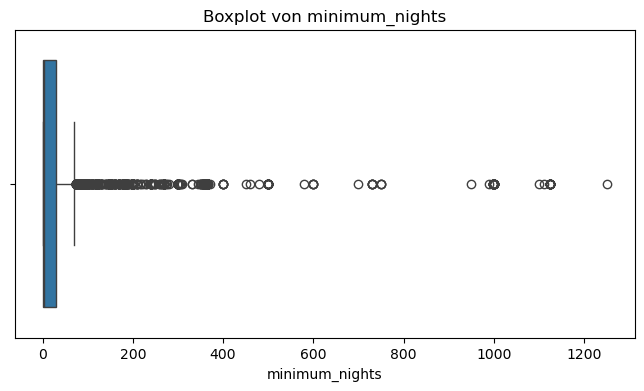

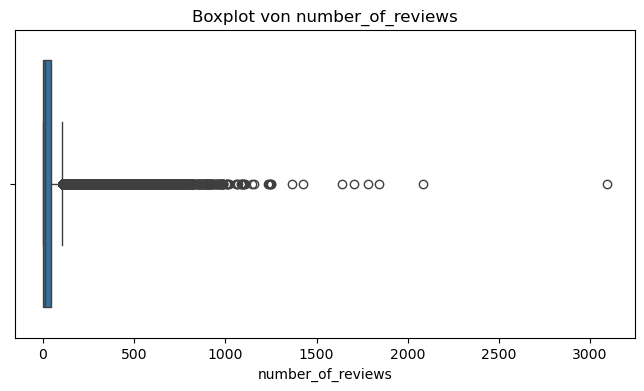

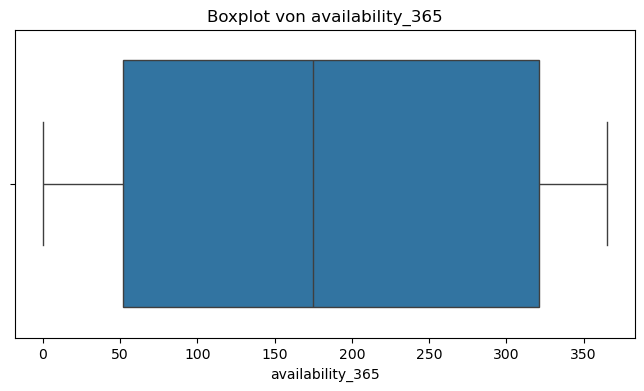

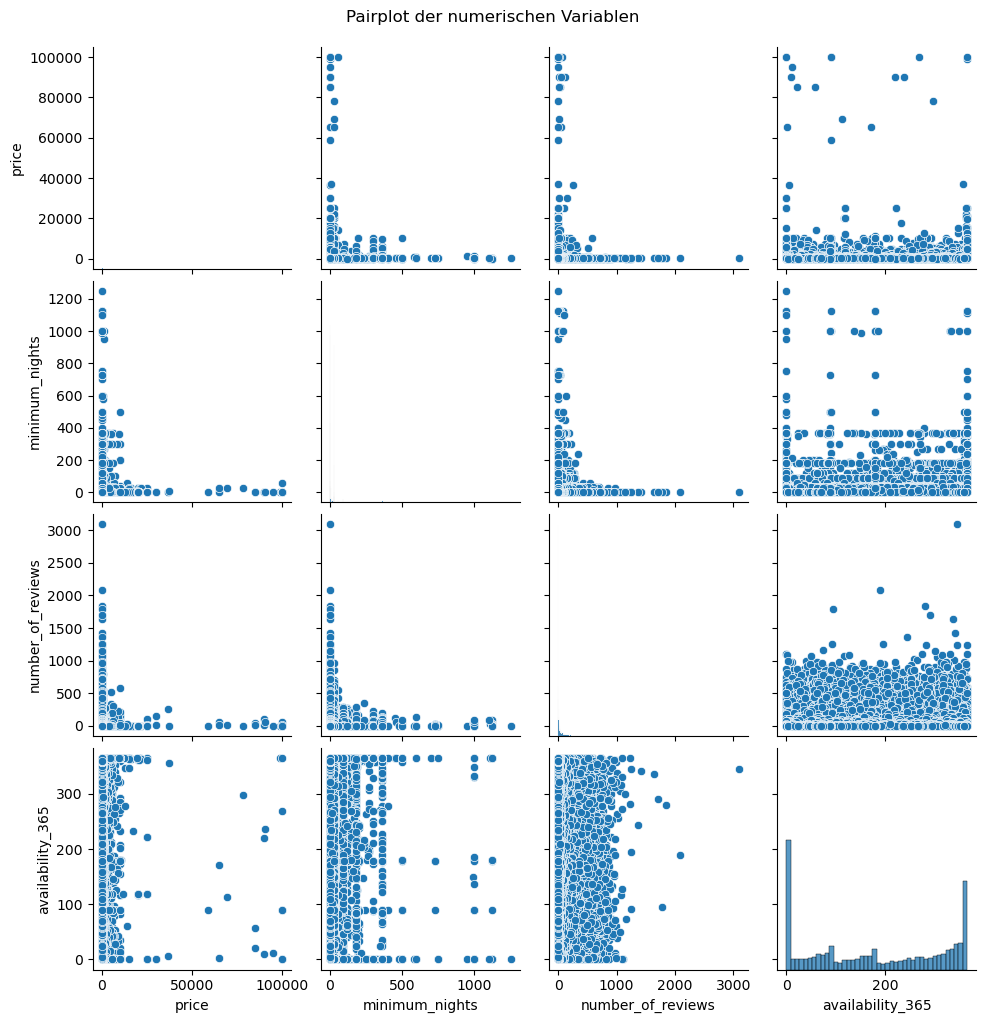

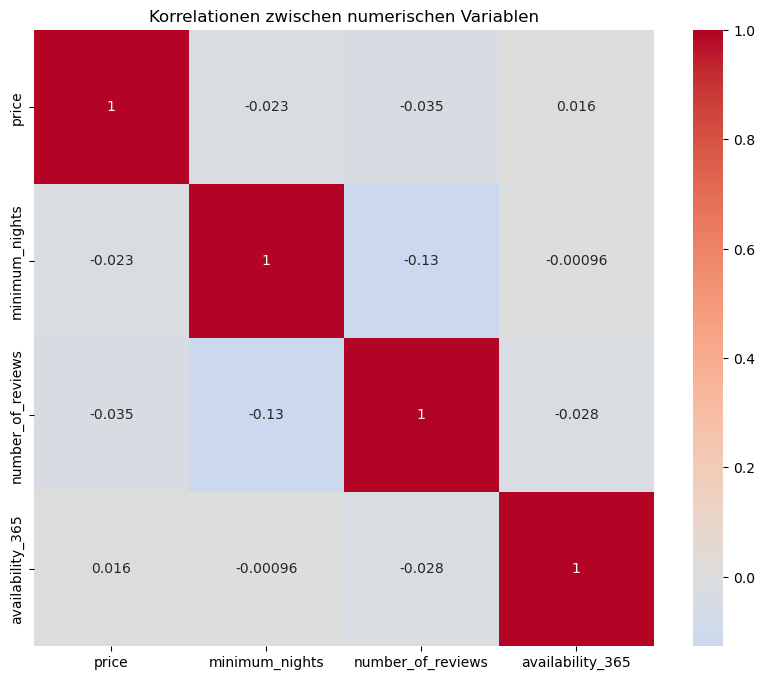

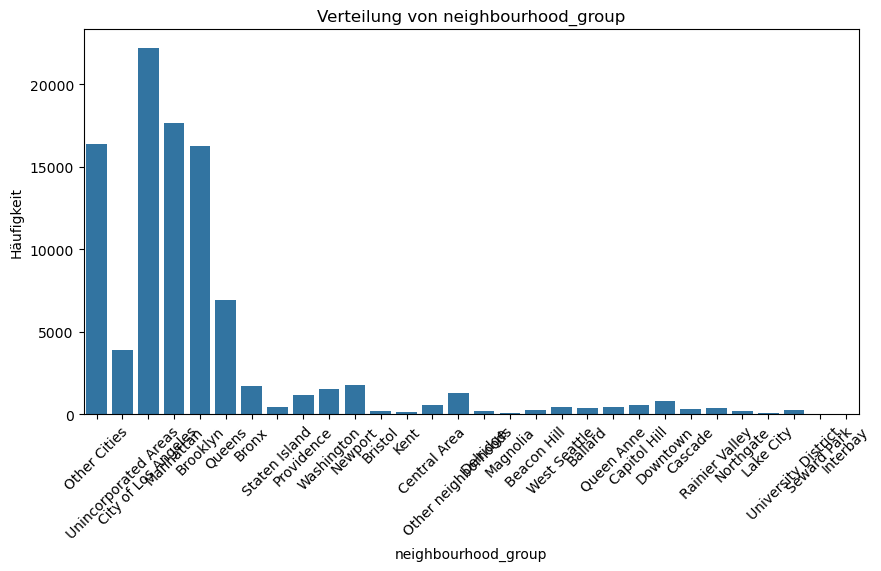

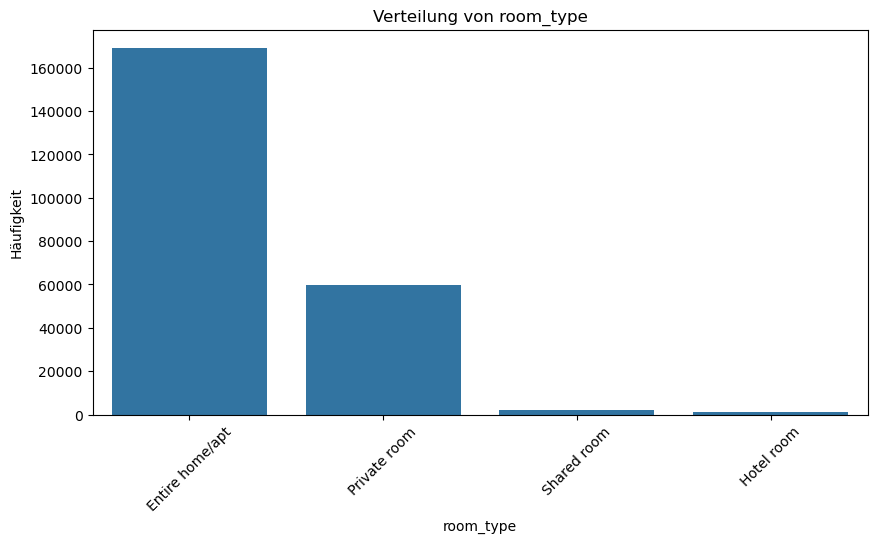

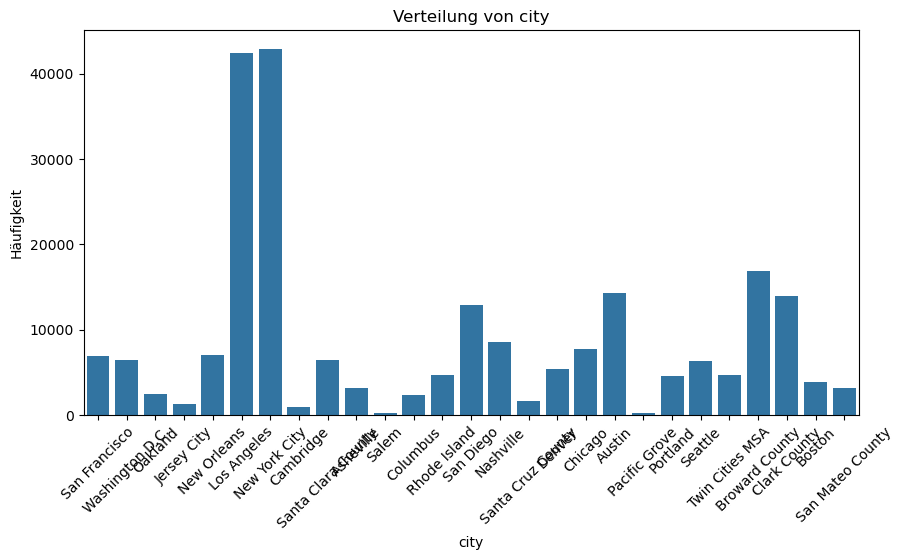

AttributeError: The geopandas.dataset has been deprecated and was removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

In [13]:
# Numerische Variablen für Histogramme und Boxplots
numerische_variablen = ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']

# 1. Histogramme für numerische Variablen
for var in numerische_variablen:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[var], kde=True)
    plt.title(f'Verteilung von {var}')
    plt.xlabel(var)
    plt.ylabel("Häufigkeit")
    plt.show()

# 2. Boxplots zur Identifizierung von Ausreißern
for var in numerische_variablen:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot von {var}')
    plt.xlabel(var)
    plt.show()

# 3. Pairplot für Beziehungen zwischen numerischen Variablen
sns.pairplot(df[numerische_variablen])
plt.suptitle("Pairplot der numerischen Variablen", y=1.02)
plt.show()

# 4. Heatmap zur Visualisierung von Korrelationen
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerische_variablen].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Korrelationen zwischen numerischen Variablen")
plt.show()

# Kategorische Variablen für Countplots
kategorische_variablen = ['neighbourhood_group', 'room_type', 'city']

# 5. Countplots für kategoriale Variablen
for var in kategorische_variablen:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=var)
    plt.title(f'Verteilung von {var}')
    plt.xlabel(var)
    plt.ylabel("Häufigkeit")
    plt.xticks(rotation=45)
    plt.show()

# 6. Geografische Visualisierung mit Geopandas
# Erstellen einer Geopandas-Datenstruktur
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Plotten der geografischen Punkte
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 10), color='lightgrey', edgecolor='black')
geo_df.plot(ax=ax, markersize=5, color='blue', alpha=0.5)
plt.title("Geografische Verteilung der Standorte")
plt.show()

### e. ethically sensitive

In [14]:
print(df['neighbourhood_group'].value_counts())
print(df['room_type'].value_counts())
print(df['city'].value_counts())
for var in numerische_variablen:
    print(f"{var} Verteilung:")
    print(df[var].describe())


neighbourhood_group
City of Los Angeles     22204
Manhattan               17658
Other Cities            16374
Brooklyn                16237
Queens                   6916
Unincorporated Areas     3873
Newport                  1749
Bronx                    1691
Washington               1526
Other neighborhoods      1292
Providence               1165
Downtown                  831
Capitol Hill              552
Central Area              543
Queen Anne                438
Staten Island             429
West Seattle              423
Ballard                   375
Rainier Valley            368
Cascade                   311
Beacon Hill               287
University District       244
Northgate                 227
Delridge                  192
Bristol                   175
Kent                      127
Lake City                 107
Magnolia                   95
Seward Park                49
Interbay                   42
Name: count, dtype: int64
room_type
Entire home/apt    169142
Private room      

#### Summary

Hier ist die Analyse zur Identifizierung potenzieller ethisch sensibler Attribute, unterrepräsentierter Klassen und Verzerrungen (Bias) in den Daten gemäß Aufgabe **e**. Die Auswertung enthält sowohl die Dokumentation relevanter Attribute als auch mögliche Maßnahmen zur Verbesserung der Balance und Reduzierung von Bias.

---

### 1. **Identifizierung potenziell ethisch sensibler Attribute**

   - **neighbourhood_group** und **city**: Diese Attribute weisen auf geografische Informationen hin. Sie können Unterschiede zwischen Stadtteilen oder Regionen sichtbar machen, die zu sozial-ökonomischen oder strukturellen Diskriminierungen führen könnten. Beispiele für Sensibilitäten sind Unterschiede zwischen Stadtteilen in New York oder Los Angeles.
   - **host_name**: Persönliche Informationen über den Gastgeber sind vorhanden und könnten unter Datenschutzaspekten problematisch sein. Hier könnte eine Anonymisierung notwendig sein.

   **Maßnahme**: Dokumentiere die Nutzung dieser sensiblen Attribute und ziehe eine Anonymisierung der Personennamen in Betracht, falls sie für die Analyse nicht direkt relevant sind.

---

### 2. **Unterrepräsentierte Klassen und unausgeglichene Verteilungen**

   Die Verteilungen der Attribute **neighbourhood_group**, **room_type** und **city** weisen auf deutliche Dominanzen hin, die Bias bei der Modellierung hervorrufen könnten:

   - **neighbourhood_group**: Die Anzahl der Einträge in `City of Los Angeles` und `Manhattan` ist stark dominant, während viele kleinere Gruppen wie `Interbay`, `Seward Park` und `Lake City` nur sehr wenige Einträge haben.
   - **room_type**: Der Raumtyp `Entire home/apt` ist stark überrepräsentiert (169,142 Einträge), während `Shared room` und `Hotel room` unterrepräsentiert sind (2,276 bzw. 970 Einträge).
   - **city**: Städte wie `New York City`, `Los Angeles` und `Broward County` sind sehr häufig vertreten, während Städte wie `Pacific Grove` oder `Salem` nur eine geringe Anzahl von Einträgen haben.

   **Maßnahme**: 
   - Ziehe eine Gewichtung oder eine **Oversampling-Technik** für die unterrepräsentierten `room_type`-Kategorien und kleineren Städte in Betracht, um sicherzustellen, dass sie nicht bei der Analyse vernachlässigt werden.
   - Prüfe, ob stark dominierende Einträge in einzelnen Städten oder Stadtteilen die Analyse beeinflussen und adjustiere dies, falls notwendig.

---

### 3. **Analyse der numerischen Variablen auf Verzerrungen**

   Die numerischen Attribute zeigen ebenfalls mögliche Verzerrungen, die bei der Analyse berücksichtigt werden sollten:

   - **price**: Der Preis hat eine große Spannweite von 0 bis 100,000 und weist eine hohe Standardabweichung auf (1,024). Die Verteilung ist rechtsgipflig, was auf einige sehr hohe Ausreißerwerte hinweist.
     - Median (`50%`-Perzentil) liegt bei 149, während der Maximalwert (100,000) extrem hoch ist, was auf mögliche Verzerrungen durch Luxus- oder außergewöhnliche Angebote hinweist.
   
   - **minimum_nights**: Die Variable `minimum_nights` hat ebenfalls eine große Bandbreite (1 bis 1,250). Der Median liegt bei 3, was darauf hinweist, dass die meisten Angebote kurze Mindestaufenthalte haben, jedoch gibt es einige Einträge mit extrem hohen Werten.
   
   - **number_of_reviews**: Diese Werte reichen von 0 bis 3,091, wobei der Median bei 9 liegt. Dies zeigt eine sehr ungleiche Verteilung in der Häufigkeit von Bewertungen.
   
   - **availability_365**: Die Verfügbarkeit ist recht ausgewogen, da der Medianwert bei 175 Tagen liegt, aber die volle Jahresverfügbarkeit (365 Tage) weist auf eine kleine Anzahl von hochverfügbaren Angeboten hin.

   **Maßnahme**:
   - Erwäge das **Entfernen oder Transformieren von Ausreißern** (z. B. Log-Transformation für `price`), um die Verzerrung durch Extremwerte zu verringern.
   - Prüfe, ob eine Standardisierung oder Normalisierung sinnvoll ist, um alle numerischen Variablen vergleichbarer zu machen.

---

### 4. **Zusammenfassung der Bias-Quellen und Maßnahmen**

Hier ist eine Tabelle mit den identifizierten Bias-Quellen und den vorgeschlagenen Maßnahmen zur Korrektur oder Verbesserung:

| Kategorie               | Möglicher Bias                                  | Lösungsvorschläge                           |
|-------------------------|-------------------------------------------------|---------------------------------------------|
| Ethisch sensible Daten  | `host_name`, `neighbourhood_group`, `city`      | Anonymisierung; begrenzter Zugang           |
| Unterrepräsentierte Gruppen | `room_type`, `neighbourhood_group`           | Oversampling oder Gewichtung                |
| Numerische Variablen    | Ausreißer bei `price`, `minimum_nights`         | Transformation oder Normalisierung          |
| Geografische Verzerrung | Überrepräsentation großer Städte wie `NYC`, `LA`| Gewichtung oder gezielte Ausgleichsmaßnahmen|

---

Mit dieser Analyse und den vorgeschlagenen Maßnahmen kannst du sicherstellen, dass deine Daten so ausgewogen und fair wie möglich sind. Die Dokumentation dieser Schritte ist wichtig, um Transparenz und Nachvollziehbarkeit bei der Datenverarbeitung zu gewährleisten.

### f. What potential risks and additional types of bias exist in the data?

####
---

## Bericht zur Risikoanalyse und Bewertung potenzieller Bias-Quellen im Datensatz

### Zusammenfassung

Der vorliegende Datensatz umfasst Merkmale zu verschiedenen Standorten, Zimmertypen, Verfügbarkeiten und Preisen von Unterkünften in mehreren Städten. Bei der Analyse sind potenzielle Verzerrungsrisiken aufgetreten, die auf unterschiedliche Verteilungen und mögliche historische, geografische oder demografische Verzerrungen hindeuten. Dieser Bericht dokumentiert die identifizierten Bias-Quellen und schlägt Fragestellungen zur weiteren Klärung durch externe Experten vor.

---

### 1. Potenzielle Bias-Quellen

#### A. User-to-Data Bias

1. **Historischer Bias**: Der Datensatz könnte bestehende soziale und geografische Ungleichheiten widerspiegeln, insbesondere in großen Städten wie New York City und Los Angeles, die dominierend im Datensatz vertreten sind. Stadtteile und geografische Regionen mit unterschiedlichem sozioökonomischen Hintergrund könnten dadurch unausgewogen dargestellt sein.
   
2. **Population Bias**: Die demografische Repräsentation, insbesondere in Attributen wie `neighbourhood_group` und `city`, könnte nicht repräsentativ für alle Bevölkerungsschichten sein, da bestimmte Stadtteile und Unterkunftsarten häufiger vertreten sind als andere. Dies könnte dazu führen, dass einige Regionen oder Unterkunftsarten bei der Analyse bevorzugt behandelt werden.

#### B. Data-to-Algorithm Bias

1. **Repräsentationsbias**: Die überrepräsentierten Kategorien, wie `room_type = Entire home/apt` (169,142 Einträge) und die Städte `New York City` und `Los Angeles`, könnten dazu führen, dass die Ergebnisse stärker auf diese häufigeren Kategorien zugeschnitten sind und seltener vertretene Kategorien weniger berücksichtigt werden.

2. **Messfehler oder Verzerrungen durch Attribute**: Der Datensatz weist extreme Ausreißerwerte in den numerischen Variablen `price` und `minimum_nights` auf, z. B. liegt der Höchstwert bei `price` bei 100,000 und der bei `minimum_nights` bei 1,250. Diese hohen Werte könnten auf Messfehler oder seltene Fälle hinweisen und Verzerrungen in der Analyse einführen, falls diese nicht korrekt verarbeitet werden.

#### C. Algorithm-to-User Bias

1. **Algorithmische Verzerrung durch überrepräsentierte Kategorien**: Da `Entire home/apt` und die Stadt `New York City` stark dominieren, könnte ein Algorithmus bei der Modellierung diese Kategorien bevorzugen und weniger genaue Ergebnisse für seltenere Kategorien liefern. 

---

### 2. Analyse der Datenqualität und Attribute

Die Qualität der numerischen und kategorialen Attribute im Datensatz zeigt ebenfalls potenzielle Risiken, insbesondere in Bezug auf Ausreißer und die Repräsentativität der Daten:

- **Numerische Variablen** wie `price`, `minimum_nights` und `number_of_reviews` haben eine hohe Standardabweichung und extreme Werte, die eine mögliche Verzerrung darstellen. Zum Beispiel zeigt die `price`-Variable einen Medianwert von 149, während der Maximalwert 100,000 beträgt, was auf mögliche Luxusobjekte oder Fehler in der Erfassung hinweisen könnte.
- **Kategoriale Variablen** wie `neighbourhood_group` und `room_type` haben eine unausgeglichene Verteilung, was darauf hindeutet, dass bestimmte Regionen oder Unterkunftsarten möglicherweise unterrepräsentiert sind. Dies könnte die Analyse beeinflussen, da einige Kategorien stärker berücksichtigt werden als andere.

---

### 3. Fragen an externe Experten

Um sicherzustellen, dass die Verzerrungen und potenziellen Bias-Quellen im Datensatz korrekt verstanden und adressiert werden, schlagen wir folgende Fragen zur Klärung mit einem externen Experten vor:

#### Zur Datenerhebung und -repräsentativität

1. **Wie wurde der Datensatz erhoben?**  
   Wurden spezifische Bevölkerungsgruppen oder geografische Regionen gezielt angesprochen, oder wurde die Datenerhebung zufällig durchgeführt?

2. **Sind alle relevanten geografischen und sozialen Gruppen angemessen vertreten?**  
   Gibt es Hinweise darauf, dass bestimmte Stadtteile oder Regionen im Datensatz systematisch unterrepräsentiert sind?

3. **Gibt es Ausschlüsse oder Lücken in der Datenerfassung?**  
   Sind bestimmte Unterkunftsarten oder Stadtteile im Datensatz möglicherweise unvollständig oder gar nicht vertreten?

#### Zur Datenqualität und Attributgenauigkeit

4. **Wie zuverlässig sind die numerischen Werte wie `price` oder `minimum_nights`?**  
   Gab es Validierungsschritte, um extrem hohe Werte und Ausreißer zu identifizieren und zu korrigieren?

5. **Welche Maßnahmen wurden getroffen, um sicherzustellen, dass die Daten vollständig und aktuell sind?**  
   Wie wurde mit fehlenden Werten in wichtigen Attributen wie `reviews_per_month` umgegangen?

#### Zur Verzerrung durch Datenattribute

6. **Gibt es bekannte geografische oder demografische Verzerrungen?**  
   Sind bestimmte Stadtteile typischerweise benachteiligt oder haben eine andere Preisdynamik, die sich im Datensatz widerspiegelt?

7. **Wurden Maßnahmen zur Vermeidung von Bias ergriffen?**  
   Wurde bei der Datenerhebung oder -aufbereitung auf Ausgewogenheit und Repräsentativität geachtet, oder gibt es Korrekturmaßnahmen, die vorgeschlagen wurden?

#### Zu ethischen und sozialen Aspekten

8. **Gibt es ethische Bedenken im Zusammenhang mit der Erfassung und Nutzung bestimmter Attribute wie `host_name` oder `neighbourhood_group`?**  
   Werden datenschutzrechtliche Standards beachtet, und sind persönliche Informationen korrekt anonymisiert oder geschützt?

9. **Welche Techniken zur Bias-Reduktion werden empfohlen?**  
   Welche Vorschläge gibt es zur Ausgleichung von Verzerrungen, beispielsweise durch angepasste Gewichtung oder durch Sampling-Methoden?

---

### 4. Empfehlungen und Maßnahmen

Basierend auf der Analyse schlagen wir folgende Maßnahmen vor, um Verzerrungen im Datensatz zu minimieren:

1. **Oversampling oder Gewichtung für unterrepräsentierte Kategorien**  
   Um die Balance zu verbessern, könnten seltenere Kategorien, wie `Shared room` bei `room_type` oder kleine Stadtteile, stärker gewichtet oder überproportional berücksichtigt werden.

2. **Transformieren oder Entfernen von Ausreißern**  
   Erwäge eine Transformation oder Entfernung von Extremwerten bei `price` und `minimum_nights`, um die Auswirkungen auf die Analyse zu reduzieren.

3. **Anonymisierung sensibler Daten**  
   Zum Schutz der Privatsphäre sollten persönliche Informationen wie `host_name` anonymisiert werden, falls sie nicht für die Analyse erforderlich sind.

---

Dieser Bericht bietet eine strukturierte Bewertung der Bias-Risiken im Datensatz und die Fragestellungen an Experten, die helfen können, mögliche Verzerrungen weiter zu klären und die Qualität der Analyseergebnisse zu verbessern.

---

#### Zusammenfassung der nächsten Schritte:
- **Analysebericht vervollständigen** und an einen Experten weiterleiten, um detaillierte Informationen zu den Verzerrungen und zur Datenqualität zu erhalten.
- **Empfohlene Maßnahmen umsetzen**, insbesondere die Gewichtung und Transformation der Daten, um die Balance und Fairness des Datensatzes zu erhöhen. 

---